In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.coordinates import AltAz
from astropy.coordinates import ICRS
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
#Load Cas A data
CasA_raw = np.fromfile('AST326_ARO_CasA_calibration.dat')

In [3]:
#Name variables accordint to lab manual
nf = CasA_raw[0].astype(np.int32) #The first number in the array, number of frequency channels
nt = CasA_raw[1].astype(np.int32) #The second number in the array, number of time slices
ns = CasA_raw[2].astype(np.int32) #The third number in the array, size of each time slice
lf = CasA_raw[3:1027] #The fourth number to the length of nf, list of frequencies
lf_flipped = np.flip(lf,axis=0) #Frequencies are in reverse order so flip

In [4]:
#Real data begins after number 1027, all of the rest is header
CasA_data = CasA_raw[1027:]

#Slice the data into the time slices
CasA_slices = CasA_data.reshape(-1, 1027)
timestamp_CasA = CasA_slices[:,0] #In MJD
alt_CasA_ARO = CasA_slices[:,1] #altitude pointing of ARO
az_CasA_ARO = CasA_slices[:,2] #azimuth pointing of ARO
StokesI_CasA_data = CasA_slices[:, 3:1027] #Stokes I samples for each frequency, in order
StokesI_CasA_ARO = np.flip(StokesI_CasA_data, axis=1) #Data is flipped on the frequency axis, so flip so in order

In [5]:
#Band that the ARO covers
print(lf_flipped) #These are backwards, so flip all the data

[4.00390625e+08 4.00781250e+08 4.01171875e+08 ... 7.99218750e+08
 7.99609375e+08 8.00000000e+08]


In [6]:
#Convert position from Alt-Az to RA-Dec
ARO_pos = EarthLocation(lat = '45d57m19.8s', lon = '281d55m37s', height = (260.4*u.m)) #Position of the ARO
times = Time(timestamp_CasA, format = 'mjd') #Puts time into correct format

#Compute RA-Dec coordinates
radec_coord = [] #Create an empty list to append the coordinates to 
for n in range(len(times)): #Iterate through the length of the time data
    #Current orientation (in Alt-Az)
    current_orient = SkyCoord(alt = alt_CasA_ARO[n]*u.deg, az = az_CasA_ARO[n]*u.deg, frame = 'altaz', \
                              obstime = times[n], location = ARO_pos)
    #Convert to RA-Dec
    current_orient_radec = current_orient.transform_to('icrs')
    #Append RA-Dec coordinates to list
    radec_coord.append(current_orient_radec)

In [7]:
#Alt-Az coordinates
AltAz_CasA_ARO = np.stack((alt_CasA_ARO, az_CasA_ARO), axis=-1)
print(AltAz_CasA_ARO)

[[ 16.488 337.747]
 [ 16.477 337.775]
 [ 16.938 337.863]
 [ 16.944 337.89 ]
 [ 17.021 337.929]
 [ 17.372 337.978]
 [ 17.383 337.984]
 [ 17.828 338.077]
 [ 17.828 338.077]
 [ 18.267 338.181]
 [ 18.278 338.181]
 [ 18.718 338.264]
 [ 18.723 338.286]
 [ 19.162 338.374]
 [ 19.168 338.401]
 [ 19.118 338.445]
 [ 19.102 338.473]
 [ 19.568 338.555]
 [ 19.574 338.577]
 [ 20.002 338.682]
 [ 20.007 338.682]
 [ 20.183 338.764]
 [ 20.446 338.808]
 [ 20.446 338.803]
 [ 20.567 338.863]
 [ 20.88  338.929]
 [ 20.88  338.923]
 [ 21.324 339.05 ]
 [ 21.324 339.039]
 [ 21.324 339.05 ]
 [ 21.752 339.193]
 [ 21.752 339.176]
 [ 21.791 339.198]
 [ 22.191 339.303]
 [ 22.191 339.297]
 [ 22.635 339.407]
 [ 22.635 339.407]
 [ 22.635 339.407]
 [ 23.074 339.55 ]
 [ 23.074 339.534]
 [ 23.08  339.534]
 [ 23.513 339.665]
 [ 23.513 339.654]
 [ 23.518 339.654]
 [ 23.952 339.792]
 [ 23.952 339.775]
 [ 24.023 339.814]
 [ 24.396 339.907]
 [ 24.396 339.896]]


In [8]:
print(radec_coord)
CasA_RA, CasA_Dec = np.loadtxt('ARO-CasA_RA_Dec_coord.txt', comments = '#', skiprows = 2, unpack = True)

[<SkyCoord (ICRS): (ra, dec) in deg
    (347.08706771, 55.09003341)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.17436607, 55.09262105)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.50152324, 55.5402946)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.54970221, 55.55758057)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.63807541, 55.64307853)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.94098838, 55.97546014)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.04010828, 55.98783688)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.35824588, 56.42241576)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.48224423, 56.4223862)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.78655693, 56.85601522)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.90736394, 56.86567507)>, <SkyCoord (ICRS): (ra, dec) in deg
    (349.25101554, 57.29008008)>, <SkyCoord (ICRS): (ra, dec) in deg
    (349.35420712, 57.30440164)>, <SkyCoord (ICRS): (ra, dec) in deg
    (349.6937485, 57.72954465)>, <SkyCoord (ICRS): (ra, dec) in deg
 

In [9]:
#Reformat time information into something readable
times.format = 'isot'
print(times)

['2017-08-05T16:45:46.414' '2017-08-05T16:46:19.470'
 '2017-08-05T16:46:39.512' '2017-08-05T16:46:59.590'
 '2017-08-05T16:47:19.638' '2017-08-05T16:47:40.173'
 '2017-08-05T16:48:03.919' '2017-08-05T16:48:23.959'
 '2017-08-05T16:48:53.709' '2017-08-05T16:49:14.239'
 '2017-08-05T16:49:40.935' '2017-08-05T16:50:01.455'
 '2017-08-05T16:50:33.283' '2017-08-05T16:50:53.316'
 '2017-08-05T16:51:13.351' '2017-08-05T16:51:33.380'
 '2017-08-05T16:52:04.413' '2017-08-05T16:52:24.449'
 '2017-08-05T16:53:00.117' '2017-08-05T16:53:20.157'
 '2017-08-05T16:53:40.388' '2017-08-05T16:54:00.830'
 '2017-08-05T16:54:20.885' '2017-08-05T16:54:41.184'
 '2017-08-05T16:55:01.278' '2017-08-05T16:55:21.321'
 '2017-08-05T16:55:54.195' '2017-08-05T16:56:14.243'
 '2017-08-05T16:56:34.286' '2017-08-05T16:57:02.283'
 '2017-08-05T16:57:22.317' '2017-08-05T16:57:42.506'
 '2017-08-05T16:58:02.842' '2017-08-05T16:58:22.882'
 '2017-08-05T16:58:54.412' '2017-08-05T16:59:14.455'
 '2017-08-05T16:59:34.498' '2017-08-05T16:59:5

<SkyCoord (ICRS): (ra, dec) in deg
    (350.85833333, 58.8)>


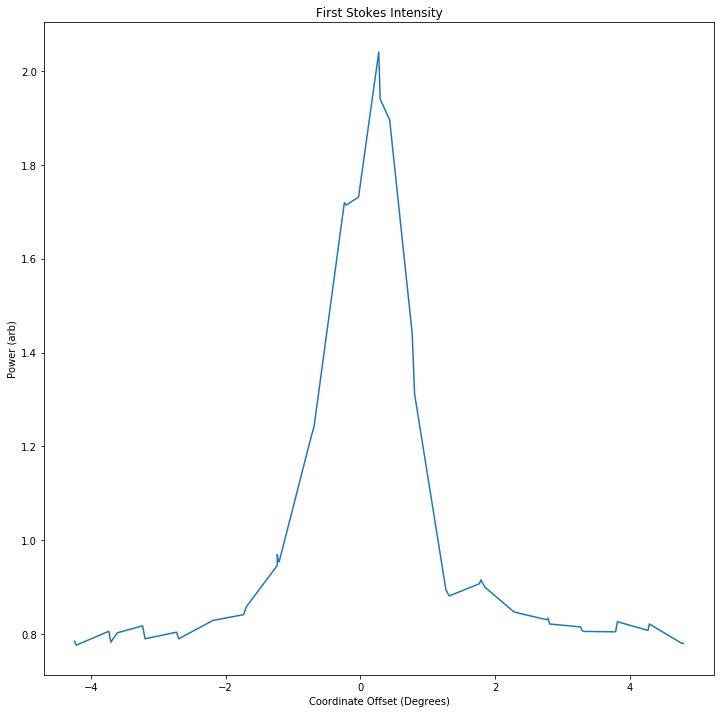

In [10]:
#Plot intensity for one frequency band
Stokes_1 = StokesI_CasA_ARO[:,0]
Stokes_mean1 = np.mean(Stokes_1)
Stokes_sigma1 = np.std(Stokes_1)

CasA = SkyCoord(ra='23h23m26s', dec = '58°48′')
#The Above converts to (ra, dec) in deg (350.85833333, 58.8)
print(CasA)

#Calculate source offset
offset_list = [] #Create empty list to append to 
for n in range(len(radec_coord)): #Iterate through length of RA-Dec coordinate list
    offset = CasA.separation(radec_coord[n]) #Calculate the offset
    offset_list.append(offset.value) #Append the offset values to the list

#Change to not absolute value
offset_neg = np.negative(offset_list[0:22]).tolist() #Select the values of the source offset that are supposed to be negative
offset_list_final = offset_list[22:] #Create final list
for i in range(len(offset_neg)): #Iterate through the length of the negative values
    offset_list_final.append(offset_neg[i]) #Append the negative values to the list
    
offset_sorted = np.sort(offset_list_final) #Sort the list in order from least to greatest
offset_array = np.array(offset_sorted) #Turn the list into an array

#Plot the first Stokes-I timeslice
plt.figure(figsize=(12,12))
plt.plot(offset_array, Stokes_1)
plt.title('First Stokes Intensity')
plt.ylabel('Power (arb)')
plt.xlabel('Coordinate Offset (Degrees)')
plt.savefig('stokes1_CasA.pdf')

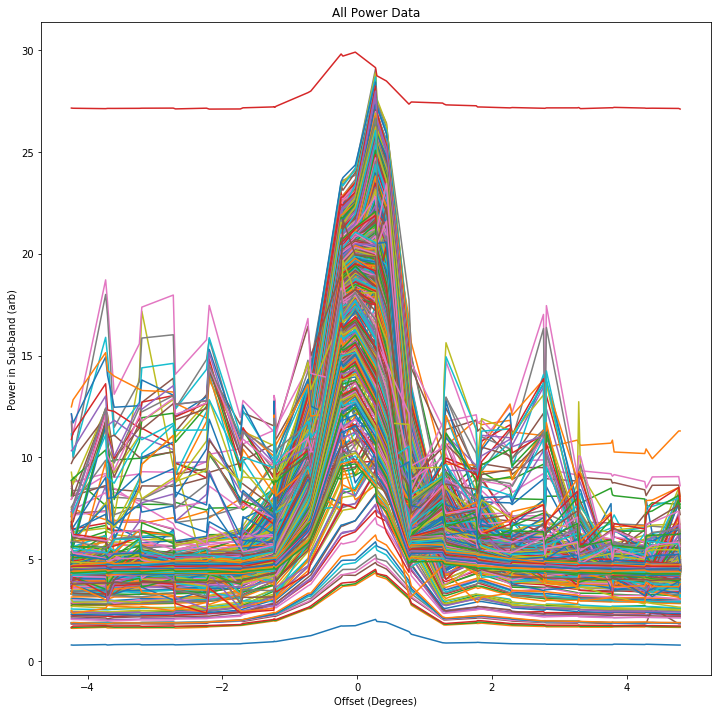

In [11]:
#Plot all Stokes I data on the same plot
plt.figure(figsize=(12,12))
plt.plot(offset_array, StokesI_CasA_ARO)
plt.title('All Power Data')
plt.xlabel('Offset (Degrees)')
plt.ylabel('Power in Sub-band (arb)')
plt.savefig('all_stokes_CasA.pdf')

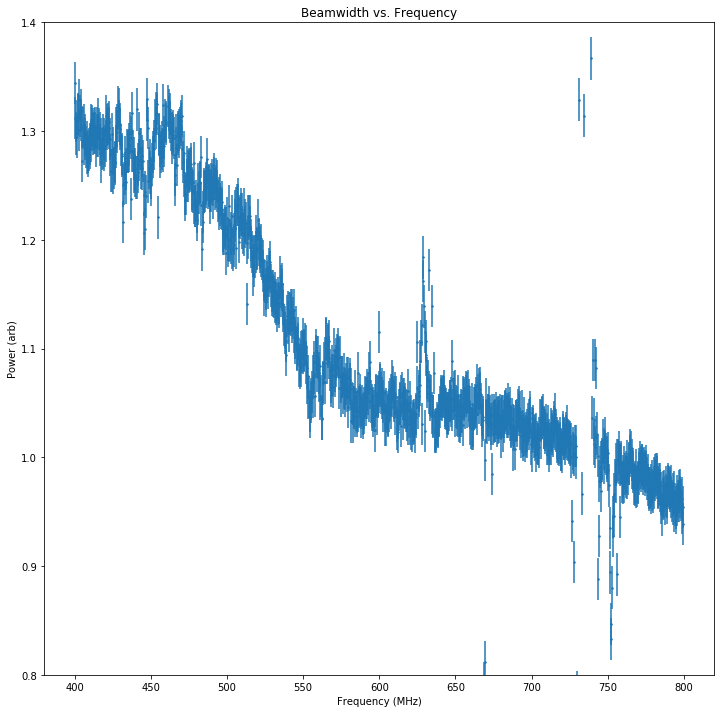

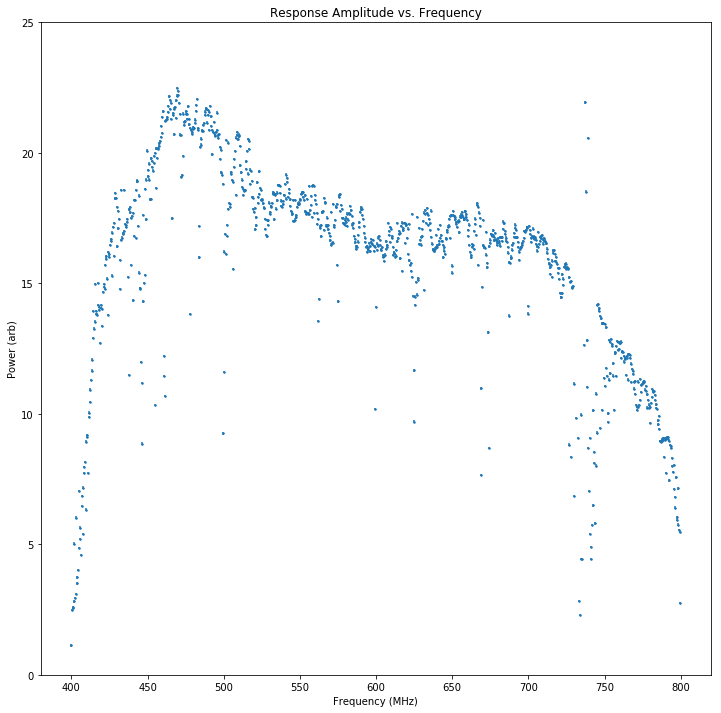

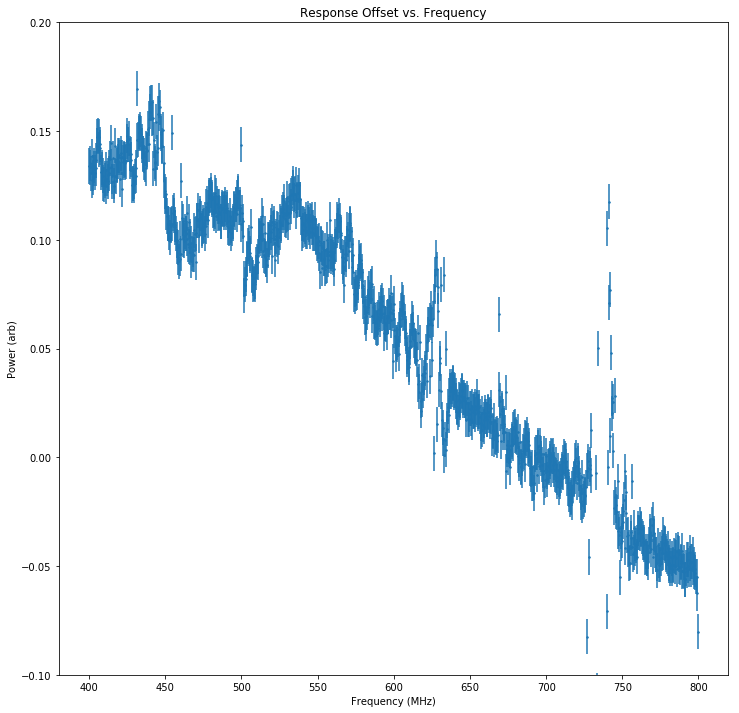

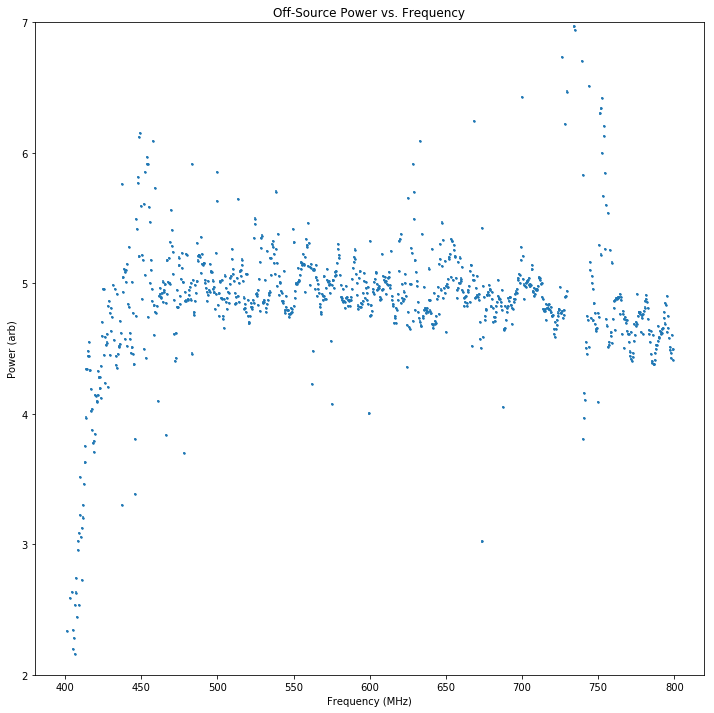

In [16]:
#Fit a Gaussian to each sub-band
#Define Gaussian function
def Gaussian(x,*p):
    A, mu, sigma, base = p
    return A*np.exp(-(x-mu)**2/(2*sigma**2))+base

p0 = [20,0,1,5] #Define initial guess
amplitude_array = np.zeros(nf) #Create empty array for amplitude data
mean_array = np.zeros(nf) #Create empty array for mean data
sigma_array = np.zeros(nf) #Create empty array for uncertainty data 
base_array = np.zeros(nf) #Create empty array for base data
for i in range(0,1024): #Iterate through the number of frequencies
    p_opt_all, p_cov_all = curve_fit(Gaussian, offset_array, StokesI_CasA_ARO[:,i], p0=p0) #Fit a Gaussian to each sub-band
    amplitude_array[i] = p_opt_all[0] #Append the amplitude data to the amplitude array
    mean_array[i] = p_opt_all[1] #Append the mean data to the mean array
    sigma_array[i] = p_opt_all[2] #Append the uncertainty data to the uncertainty array
    base_array[i] = p_opt_all[3] #Append the base data to the base array

#Calculate the errors in the fits from the diagonals of the covariance matrices
amplitude_err = np.sqrt(p_cov_all[0][0]) #Calculate the standard deviation of the amplitude
mean_err = np.sqrt(p_cov_all[1][1]) #Calculate the standard deviation of the mean
bw_err = 2.355*np.sqrt(p_cov_all[2][2]) #Calculate the standard deviation of the uncertainty (which is the beamwidth)
base_err = np.sqrt(p_cov_all[1][1]) #Calculate the standard deviation of the base

#Create the frequency axis
freq_axis = np.arange(400,800,(400/1024))

#Calculate the experimental beamwidth
FWHM_exp = 2.355*sigma_array

#Plot the experimental beamwidth
plt.figure(figsize=(12,12))
plt.errorbar(freq_axis, FWHM_exp, xerr=None, yerr=bw_err, ls='',marker='o',markersize=1.5)
plt.ylim(0.8,1.4)
plt.title('Beamwidth vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (arb)')
plt.savefig('FWHM_exp.pdf')

#Plot the response amplitude of the ARO (amplitude data)
plt.figure(figsize=(12,12))
plt.errorbar(freq_axis, amplitude_array, xerr=None, yerr=amplitude_err, ls='', marker='o', markersize=1.5)
plt.ylim(0,25)
plt.title('Response Amplitude vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (arb)')
plt.savefig('response_amplitude.pdf')

#Plot the response offset of the ARO (mean data)
plt.figure(figsize=(12,12))
plt.errorbar(freq_axis, mean_array, xerr=None, yerr=mean_err, ls='', marker='o', markersize=1.5)
plt.ylim(-0.1,0.2)
plt.title('Response Offset vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (arb)')
plt.savefig('response_offset.pdf')

#Plot the off-source power of the ARO (base data)
plt.figure(figsize=(12,12))
plt.errorbar(freq_axis, base_array, xerr=None, yerr=base_err, ls='', marker='o', markersize=1.5)
plt.ylim(2,7)
plt.title('Off-Source Power vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (arb)')
plt.savefig('offsource_power.pdf')

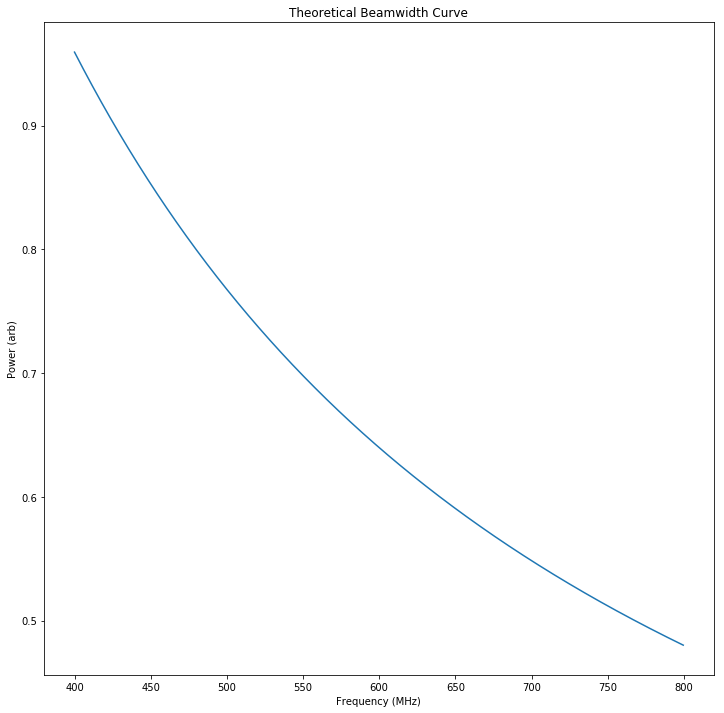

In [21]:
#Calculate the theoretical beamwidth
c = 3*(10**8) #speed of light

#Calculate wavelength data
wavelength = np.zeros(len(lf_flipped)) #Create empty array to append data to
for i in range(0, len(lf_flipped)): #Iterate through the length of the frequency data
    wavelength[i] = c/lf_flipped[i] #Append the wavelengths

#Calculate theoretical beamwidth
FWHM_theory = np.zeros(len(lf_flipped)) #Create empty array to append data to
for i in range(0, len(wavelength)): #Iterate through length of wavelength data
    FWHM_theory[i] = (1.028*wavelength[i]/46)*(180/np.pi) #Calculate theoretical beamwidth and convert from rad to degrees

#Create frequency axis
freq_axis = np.arange(400,800,(400/1024))

#Plot theoretical beamwidth
plt.figure(figsize=(12,12))
plt.plot(freq_axis, FWHM_theory)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (arb)')
plt.title('Theoretical Beamwidth Curve')
plt.savefig('theory_beam.pdf')

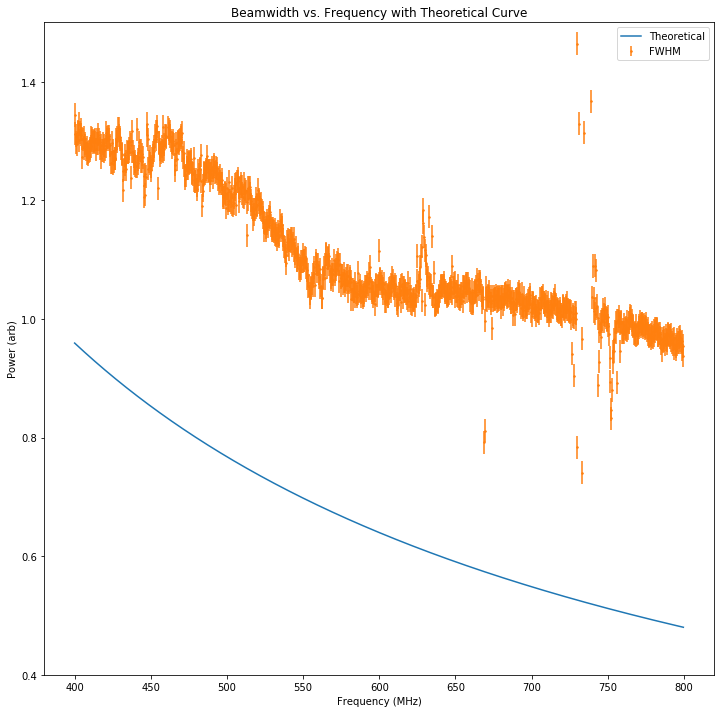

In [22]:
#Plot beamwidth against theoretical curve
plt.figure(figsize=(12,12))
plt.plot(freq_axis, FWHM_theory, label='Theoretical')
plt.errorbar(freq_axis, FWHM_exp, xerr=None, yerr=bw_err, ls='',marker='o',markersize=1.5, label='FWHM')
plt.ylim(0.4,1.5)
plt.title('Beamwidth vs. Frequency with Theoretical Curve')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (arb)')
plt.legend()
plt.savefig('FWHM_theory.pdf')

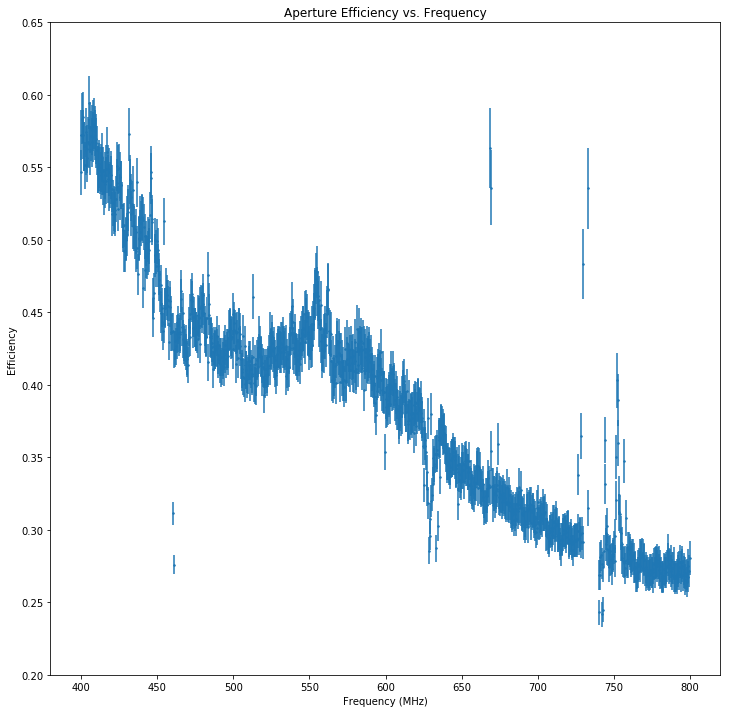

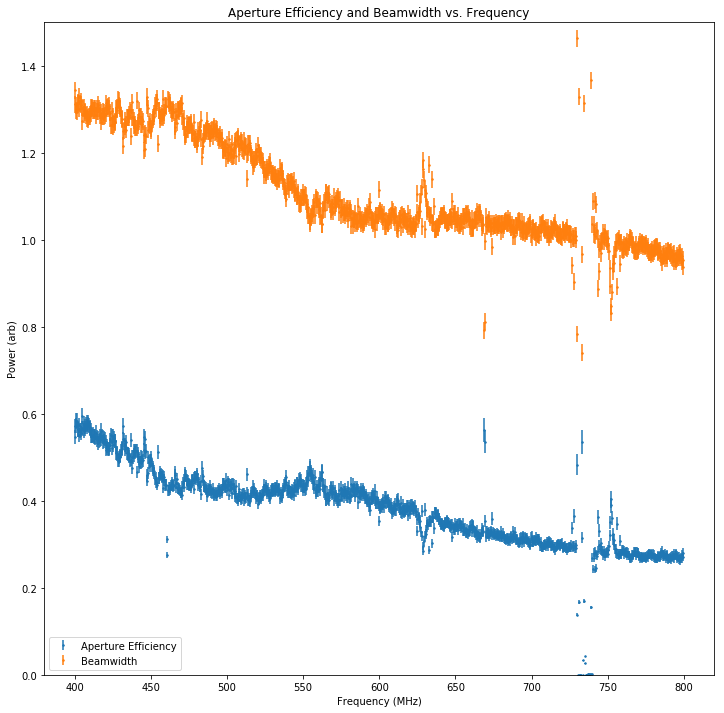

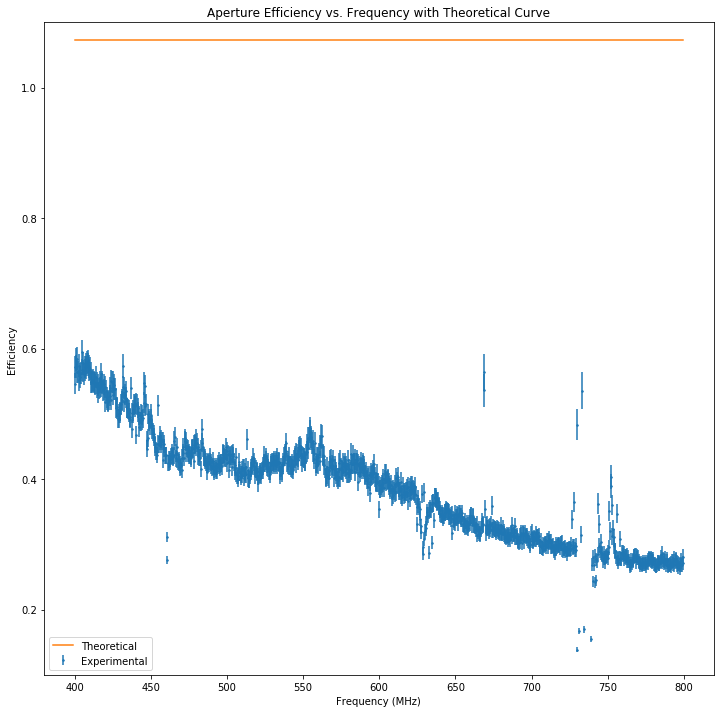

In [25]:
#Calculate aperture efficiency:
#Calculate solid angle
Omega = np.pi*(FWHM_exp*(np.pi/180))**2/(4*np.log(2))
#Calculate solid angle error
Omega_err = ((np.pi*2*FWHM_exp*bw_err)*(np.pi/180)**2)/(4*np.log(2))

#Calculate collecting area 
Ae = wavelength**2/Omega 
#Calculate collecting area error
Ae_err = (wavelength**2)*(Omega_err/(Omega**2))

#Calculate geometric area of the telescope
A_geom = np.pi*(22.9**2)

#Calculate aperture efficiency
eta = Ae/A_geom
#Calculate aperture efficiency error
eta_err = Ae_err/A_geom

#Plot aperture efficiency
plt.figure(figsize=(12,12))
plt.errorbar(freq_axis, eta, xerr=None, yerr=eta_err, ls='', marker='o', markersize=1.5)
plt.title('Aperture Efficiency vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Efficiency')
plt.ylim(0.2,0.65)
plt.savefig('aperture_efficiency.pdf')

#Plot aperture efficiency and beamwidth
plt.figure(figsize=(12,12))
plt.errorbar(freq_axis, eta, xerr=None, yerr=eta_err, ls='', marker='o', markersize=1.5, label='Aperture Efficiency')
plt.errorbar(freq_axis, FWHM_exp, xerr=None, yerr=bw_err, ls='', marker='o', markersize=1.5, label='Beamwidth')
plt.legend()
plt.ylim(0,1.5)
plt.title('Aperture Efficiency and Beamwidth vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (arb)')
plt.savefig('eta_bw.pdf')

#Calculate theoretical aperture efficiency
#Calculate theoretical solid angle
Omega_theory = np.pi*(np.radians(FWHM_theory))**2/(4*np.log(2))
#Calculate theoretical effective area
Ae_theory = wavelength**2/Omega_theory
#Calculate theoretical aperture efficiency
eta_theory = Ae_theory/A_geom

#Plot aperture efficiency and theoretical aperture efficiency
plt.figure(figsize=(12,12))
plt.errorbar(freq_axis, eta, xerr=None, yerr=eta_err, ls='', marker='o', markersize=1.5, label='Experimental')
plt.plot(freq_axis, eta_theory, label='Theoretical')
plt.legend()
plt.title('Aperture Efficiency vs. Frequency with Theoretical Curve')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Efficiency')
plt.ylim(0.1,1.1)
plt.savefig('eta_etatheory.pdf')

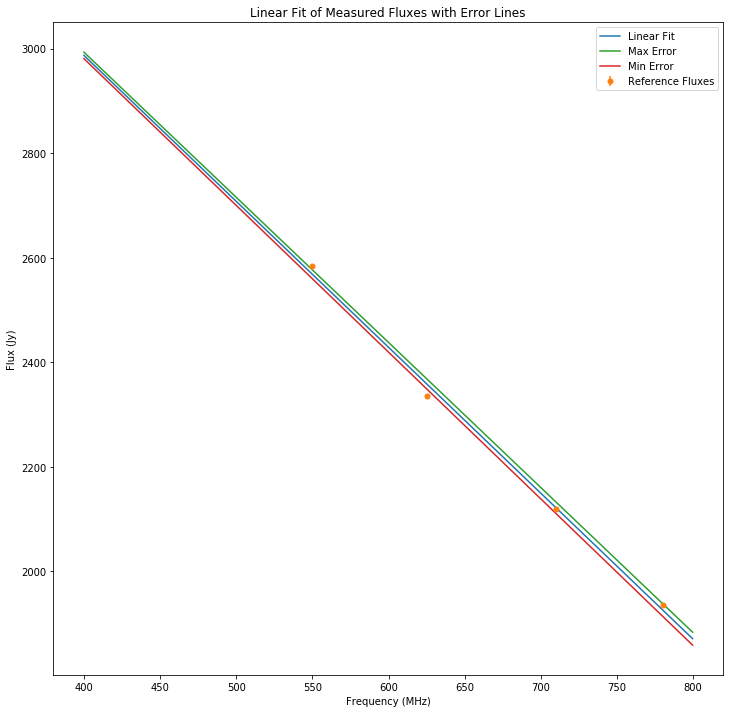

In [27]:
#Fluxes according to Baars et al (fluxes have dimmed roughly 50% in the last 40 years): 
#550MHz = 5170Jy
#625MHz = 4670Jy
#710MHz = 4240Jy
#780MHz = 3870Jy

#Create array for frequencies being used
measured_freqs_MHz = np.array((550, 625, 710, 780))

#Create arrays for fluxes
measured_flux_1977_SI = np.array((5170, 4670, 4240, 3870))*10e-26 #Reference fluxes, convert from Jy to W/m^2Hz
measured_flux_1977_Jy = np.array((5170, 4670, 4240, 3870)) #Reference fluxes

#Create arrays for current fluxes 
measured_flux_now_SI = measured_flux_1977_SI*.5 #Divide by 2 because has dimmed 50%
measured_flux_now_Jy = measured_flux_1977_Jy*.5 #Divide by 2 because has dimmed 50%

#Define linear model function
def linear(x,b,m):
    y = m*x + b
    return y

#Define x-axis data
x_freq_data = np.arange(400,800, 400/len(measured_flux_now_Jy))

#Linear fit for reference fluxes
p_opt, p_cov = curve_fit(linear, measured_freqs_MHz, measured_flux_now_Jy, p0=(1,0))
p_opt_flux = p_opt
p_cov_flux = p_cov

#Plot reference fluxes with fit
#Define array for estimated reference fluxes around ARO band, where I have extended x-axis to cover whole frequency band (400-800MHz)
estimated_ref_flux = linear(np.arange(400,800, 400/1024),*p_opt_flux) 

#Plot reference flux fits with error lines
plt.figure(figsize=(12,12))
plt.plot(np.arange(400,800,400/1024), estimated_ref_flux, label='Linear Fit')
plt.errorbar(measured_freqs_MHz, measured_flux_now_Jy, yerr = p_cov_flux[1][1], ls='', marker='o', markersize=5, \
             label='Reference Fluxes')
plt.plot(np.arange(400,800,400/1024), linear(np.arange(400,800,400/1024), p_opt_flux[0], \
                                             (p_opt_flux[1]+p_cov_flux[1][1])), label='Max Error')
plt.plot(np.arange(400,800,400/1024), linear(np.arange(400,800,400/1024), p_opt_flux[0], \
                                             (p_opt_flux[1]-p_cov_flux[1][1])), label='Min Error')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Jy)')
plt.title('Linear Fit of Measured Fluxes with Error Lines')
plt.legend()
plt.savefig('ref_flux.pdf')

[1163.81507608]
[61.67337645]
-0.009511083901105043
25.904513834402174


/Applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


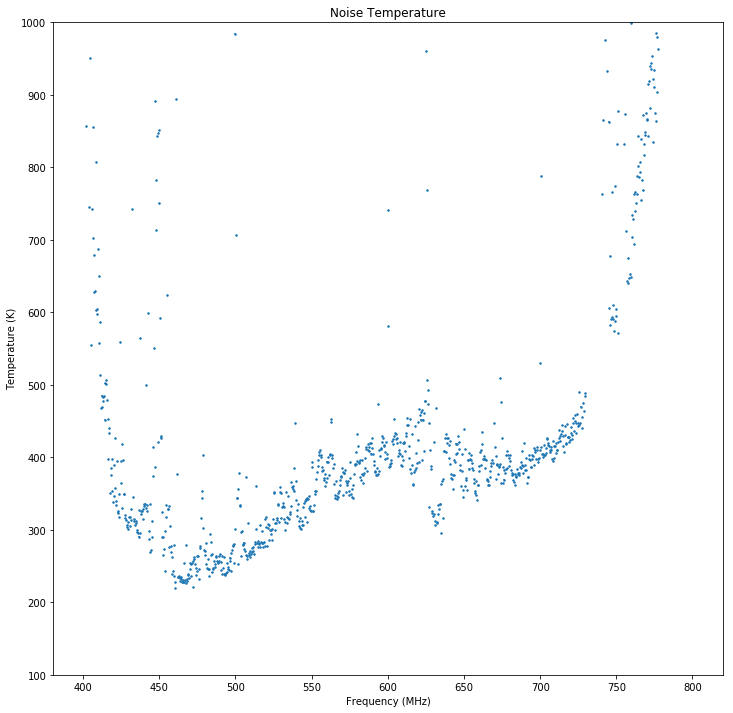

In [34]:
#Calculate the temperature corresponding to 625MHz:
wavelength_625 = 3e8/625e6 #Calculate the wavelength corresponding to 625MHz
kB = 1.380648e-23 #Define Boltzmann's constant

#Find the solid angle that corresponds to 625 MHz 
pos = np.where(lf[::-1] == 625e6)
Tangle = Omega[pos[0]]

#Define the effective aperture for 625MHz
Ae_625 = np.pi*(45.8/2)**2*eta[::-1][pos[0]]

#Apply the equation to change temperature to the equation given to us in the lab manual
#This equation is rearranged using the known equation for power
T_625= measured_flux_now_Jy[1]*Ae_625/kB*1e-26 #Calculate the temperature of Cas A to the ARO at 625MHz
print(T_625)
T_625_err = measured_flux_now_Jy[1]*(T_625*(Ae_err[pos[0]]/Ae_625))/kB*1e-26 #Calculate the error in this temperature
print(T_625_err)

#Define functions for initial conditions
#Function for gain
def p0(x,y,n):
    p0 = ((n*np.sum(x*y)) - (np.sum(x)*np.sum(y)))/((n*np.sum(x**2)) - ((np.sum(x))**2))
    return p0

#Function for system noise 
def p1(x,y,n,p):
    p1 = (1/n)*(np.sum(y) - p*np.sum(x))
    return p1

#Calculate the temperature of Cas A for all frequencies
A_all = np.pi*(45.8/2)**2*eta[::-1] #Calculate the effective area over the frequencies
A_all_err = eta_err*np.pi*((48.5/2)**2) #Calculate the error in the effective area
T_all = estimated_ref_flux*A_all/kB*1e-26 #Calculate the temperature over all frequencies
T_all_err = T_all*np.sqrt(((p_cov_flux[1][1]/estimated_ref_flux)**2 + (A_all_err/A_all/kB*1e-26)**2)) #Calculate the error in the temperature

#Subract the power of the off source from the power of the source
powersource = StokesI_CasA_ARO[22]-StokesI_CasA_ARO[0]

#Calculate initial guess for fits
p0_T = p0(T_all, powersource, 1024)
print(p0_T)
p1_T = p1(T_all, powersource,1024,p0_T)
print(p1_T)

#Fit a line for every frequency
poptT = np.zeros((2,1024)) #Create empty array for parameters
pcovT = np.zeros((2,2)) #Create empty array for covariance matrix
for i in np.arange(1024): #Iterate through frequency band and perform linear fitting    
    popT,covT, = curve_fit(linear, [10,T_all[::-1][i]], [StokesI_CasA_ARO[::][0,i], powersource[::][i]], p0 = (p0_T,p1_T))
    poptT[0,i] = popT[0]
    poptT[1,i] = popT[1]

#Plot the noise temperature
plt.figure(figsize=(12,12))
plt.errorbar(lf_flipped/1e6, poptT[0]/poptT[1], xerr=None, yerr=T_all_err, ls ='', marker ='o', markersize=1.5)
plt.title('Noise Temperature')
plt.ylim(100,1000)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.savefig('noise_temp.pdf')
#Note that the covariance matrix cannot be estimated because we are fitting two points for each fit only, 
#resulting in perfect fits with no errors

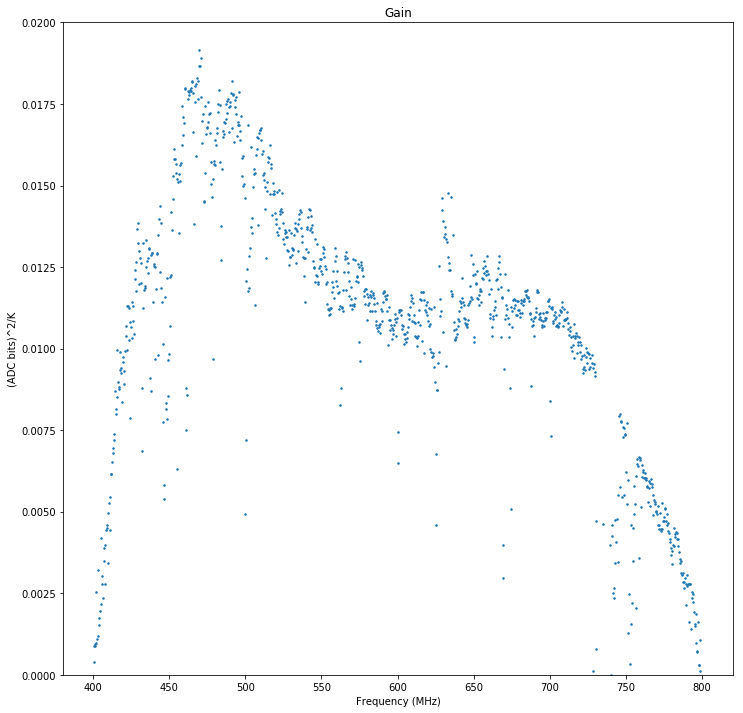

In [32]:
#Plot the gain
plt.figure(figsize=(12,12))
plt.errorbar(lf_flipped/1e6, poptT[1], ls='', marker='o', markersize=1.5)
plt.title('Gain')
plt.xlabel('Frequency (MHz)')
plt.ylabel('(ADC bits)^2/K')
plt.ylim(0,0.02)
plt.savefig('gain.pdf')

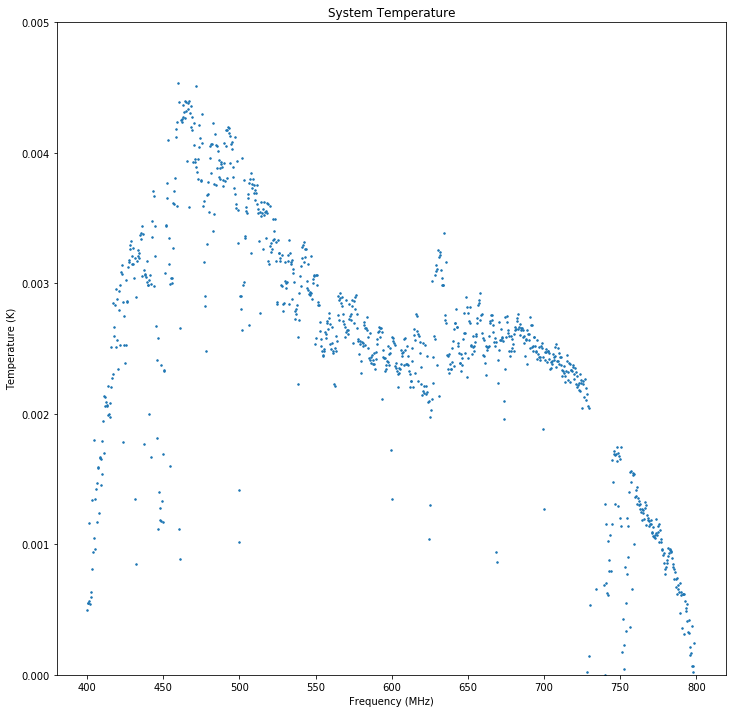

In [33]:
#Calculate system temperature
Tsys = poptT[1]/poptT[0]

#Plot the system temperature
plt.figure(figsize=(12,12))
plt.errorbar(np.arange(400,800,400/len(Tsys)), Tsys, ls='', marker='o', markersize=1.5) 
plt.title('System Temperature')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.ylim(0,0.005)
plt.savefig('sys_temp.pdf')